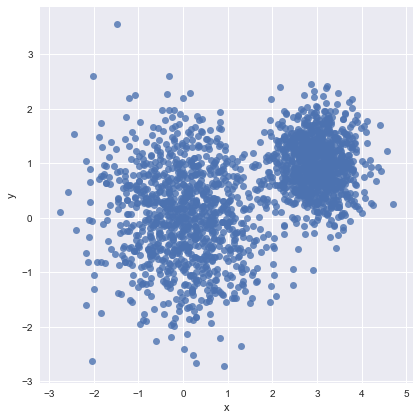

Ops initiated
Done clustering over 100 steps
Centroids
[[ 2.96781254  0.97529382]
 [ 0.15079479  0.82892442]
 [-0.9721089  -0.11236352]
 [ 0.58284712 -0.72920048]]


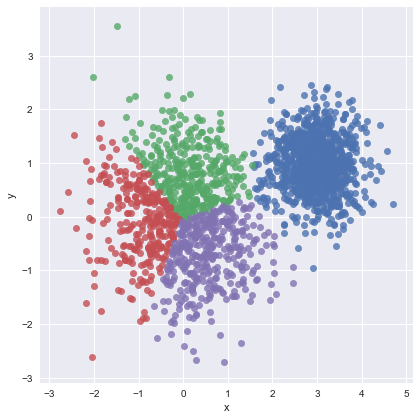

In [75]:
""" K-means clustering algorithm
Initialized by randomly choosing K observations in the data and
considering them to be centroids"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num_points = 2000
vectors = []

np.random.seed(1)

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        vectors.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

df_original = pd.DataFrame({'x': [v[0] for v in vectors], 'y': [v[1] for v in vectors]})
sns.lmplot('x', 'y', data=df, fit_reg=False, size=6)
plt.show()

vectors = tf.constant(vectors)

k = 4

steps = 100

centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2), 0)

### Be careful, tf.concat switched order of inputs
# means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in xrange(k)])

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]) for c in range(k)], 0)
update_centroids = tf.assign(centroids, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
print('Ops initiated')
for step in range(steps):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

print('Done clustering over {} steps'.format(steps))
print('Centroids')
print(centroid_values)

vec = vectors.eval(session=sess)


results = np.column_stack((vec, assignment_values.ravel()))


df = pd.DataFrame(results, columns=['x', 'y', 'cluster'])

sns.lmplot(x='x', y='y', data=df, fit_reg=False, size=6, hue='cluster',legend=False)
plt.show()